## Интеллектуальный анализ данных – весна 2024
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html).

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [168]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования. Используйте [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).

In [ ]:
X.isna().mean()

alcohol                         0.0
malic_acid                      0.0
ash                             0.0
alcalinity_of_ash               0.0
magnesium                       0.0
total_phenols                   0.0
flavanoids                      0.0
nonflavanoid_phenols            0.0
proanthocyanins                 0.0
color_intensity                 0.0
hue                             0.0
od280/od315_of_diluted_wines    0.0
proline                         0.0
dtype: float64

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

Используйте аргумент `stratify` при разбиении. Почему это важно?

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train = pd.DataFrame()
X_test = pd.DataFrame()

y_train = np.array([])
y_test = np.array([])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 20, stratify = y)

In [ ]:
print(np.bincount(y_train))
print(np.bincount(y_test))

[41 50 33]
[18 21 15]


**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [ ]:
X_train_ALMAsubset = X_train[['alcohol', 'magnesium']]
X_test_ALMAsubset = X_test[['alcohol', 'magnesium']]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_ALMAsubset)
X_test_scaled = scaler.transform(X_test_ALMAsubset)

k_values = [1, 3 ,5, 10, 11, 15, 25]



print('k\tTrain\tTest')
for k in k_values:
  k_neighbors = KNeighborsClassifier( n_neighbors = k )

  k_neighbors.fit(X_train_scaled, y_train)

  y_train_predict = k_neighbors.predict(X_train_scaled)
  y_test_predict = k_neighbors.predict(X_test_scaled)

  train_score = accuracy_score(y_train, y_train_predict)
  test_score = accuracy_score(y_test, y_test_predict)

  print(f'{k}\t{train_score:.2}\t{test_score:.2}')

k	Train	Test
1	1.0	0.59
3	0.85	0.7
5	0.81	0.69
10	0.74	0.78
11	0.73	0.8
15	0.71	0.72
25	0.76	0.72


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/).

In [ ]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [ ]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов.
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново.
6. Построение графика может занять некоторое время – придётся немного подождать!

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

In [ ]:
clf1 = KNeighborsClassifier( n_neighbors = 1 )
clf2 = KNeighborsClassifier( n_neighbors = 3 )
clf3 = KNeighborsClassifier( n_neighbors = 5 )
clf4 = KNeighborsClassifier( n_neighbors = 10 )
clf5 = KNeighborsClassifier( n_neighbors = 15 )
clf6 = KNeighborsClassifier( n_neighbors = 25 )

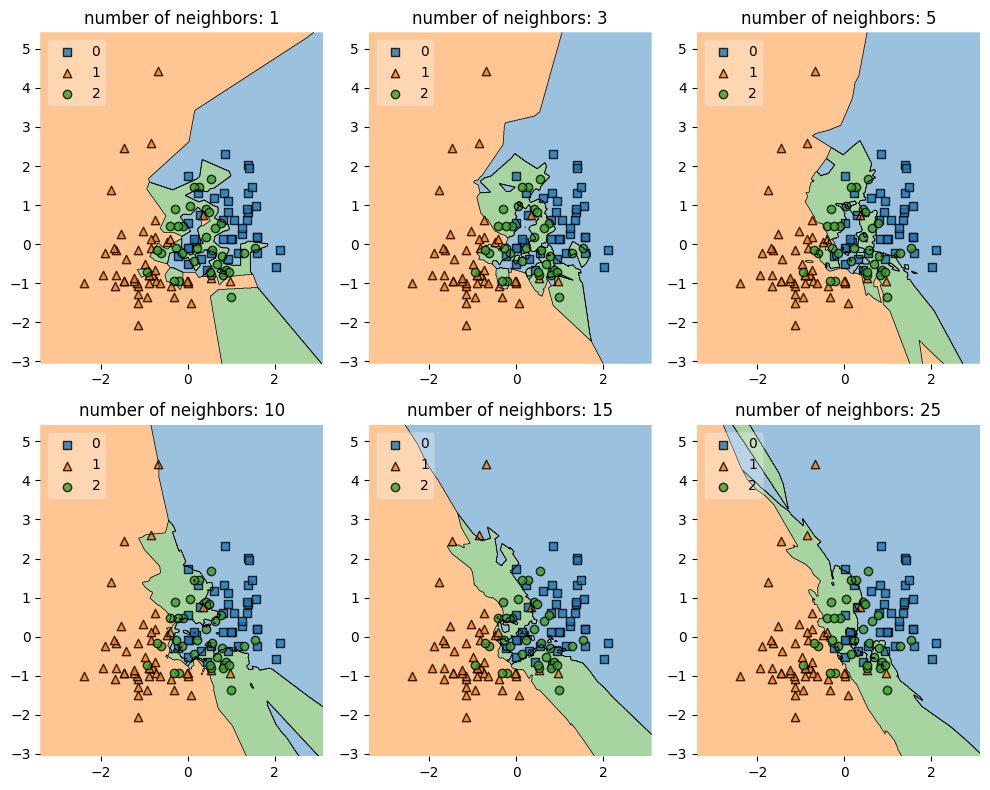

In [ ]:
gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(10,8))

labels = ['number of neighbors: 1', 'number of neighbors: 3', 'number of neighbors: 5', 'number of neighbors: 10', 'number of neighbors: 15', 'number of neighbors: 25']
grids = [[0,0],[0,1],[0,2],[1,0],[1,1],[1,2]]


for clf, lab, grd in zip([clf1, clf2, clf3, clf4, clf5, clf6], labels, grids):

    clf.fit(X_train_scaled, y_train)
    ax = plt.subplot(gs[grd[0],grd[1]])
    fig = plot_decision_regions(np.array(X_train_scaled), np.array(y_train), clf=clf, legend=2)
    plt.title(lab)

plt.tight_layout()
plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности. Какие из результатов явно говорят о переобучении модели? Почему?



---


Если анализировать визуализации для разного числа соседей, то мы можем придти к выводу, что 3, 5, 10 - это оптимальные значения, для этой задачи.                                                                                                                                                         
Этот тезис аргументируется геометрией разбиения, ведь при слишком малых значениях k образуются мини-островки, из-за чего предсказания даются неудачно, однако и прибольшом числе соседей данные начинают наслаиваться друг на друга, что приводит к плохим результатам.                                                                                                                                                     
Или возьмём случай с 25-ю соседями - там явно видно переобучение, когда мы видим одинокий оранжевый треугольник в пустой синей зоне

### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

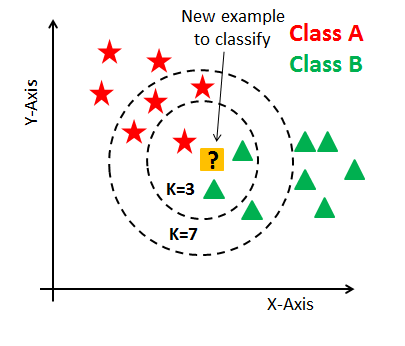

In [139]:
from statistics import mode

In [134]:
class KNN:
    def __init__(self, k:int):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

        self.m, self.n = X_train.shape

    def predict(self, X_test):
        self.X_test = X_test
        self.m_test, self.n = X_test.shape

        y_predict = np.zeros(self.m_test)

        for i in range(self.m_test):
          x = self.X_test[i]

          k_neighbors = np.zeros(self.k)
          k_neighbors = self.count_distance(x)

          y_predict[i] = mode( k_neighbors )

        return y_predict

    def count_distance(self, x):
      distances = np.zeros(self.m)

      for i in range( self.m ) :
        dist = self.euclidean( x, self.X_train[i] )
        distances[i] = dist


      indexes = distances.argsort()
      y_train_sorted = self.y_train[indexes]

      return y_train_sorted[:self.k]


    def euclidean( self, x, x_train ) :
        return np.sqrt( np.sum( np.square( x - x_train ) ) )

In [167]:
# Не меняйте файл!
knn = KNN(k=1)
X_train =  np.array([[1, 1], [2, 2]])
y_train =  np.array([0, 1])
X_test =  np.array([[1.5, 1.5]])
knn.fit(X_train, y_train)
assert knn.predict(X_test) == [0]

knn = KNN(k=3)
X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
X_test = np.array([[9.5, 9.5]])
knn.fit(X_train, y_train)
assert knn.predict(X_test) == [1]

knn = KNN(k=3)
X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
X_test = np.array([[5.5, 5.5]])
knn.fit(X_train, y_train)
assert knn.predict(X_test) == [1]

knn = KNN(k=3)
X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
X_test = np.array([[15, 15]])
knn.fit(X_train, y_train)
assert knn.predict(X_test) == [1]

knn = KNN(k=3)
X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
X_test = np.array([[5, 5], [2, 2]])
knn.fit(X_train, y_train)
assert all(knn.predict(X_test) == [1, 0])

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [171]:
diamonds = 'https://raw.githubusercontent.com/hse-ds/iad-intro-ds/eb2cd3de1f0d30edc2fedb958bf67397408dd324/2024/homeworks/hw04_knn_linreg/diamonds.csv'
data = pd.read_csv(diamonds)
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.2 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их.
Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [173]:
data.isna().mean()

Unnamed: 0    0.0
carat         0.0
cut           0.0
color         0.0
clarity       0.0
depth         0.0
table         0.0
price         0.0
x             0.0
y             0.0
z             0.0
dtype: float64

In [174]:
data = data.drop(['Unnamed: 0'], axis = 1)

In [175]:
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


**Задача 3.2 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [176]:
import seaborn as sb

<Axes: >

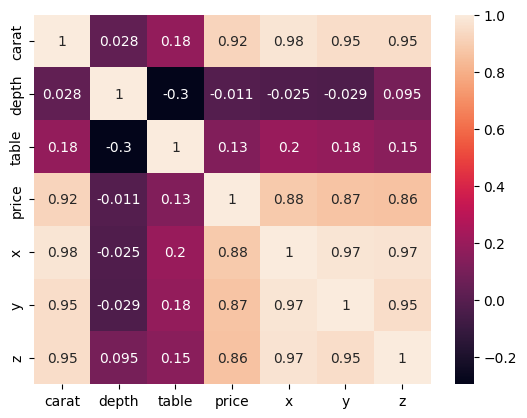

In [177]:
correlation_matrix = data.corr(numeric_only = True)

sb.heatmap(correlation_matrix, annot=True)



---

Сильнее всего, с целевой переменной (price), сильно коррелируют carat, а также размеры x, y, z

**Задача 3.3 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [178]:
from sklearn.preprocessing import OneHotEncoder

In [179]:
category = data.select_dtypes(include=['object']).columns.tolist()
if category:
  encoder = OneHotEncoder(sparse_output=False)
  df_encoded = pd.DataFrame(encoder.fit_transform(data[category]))
  df_encoded.columns = encoder.get_feature_names_out(category)

  data = data.drop(category, axis=1)
  data = pd.concat([data, df_encoded], axis=1)

  df = data

In [180]:
df

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


**Задача 3.4 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3. Не забудьте про параметр `stratify`.

In [181]:
from sklearn.model_selection import train_test_split

In [182]:
y = df['price']
X = df.drop('price', axis = 1)
y_binned = pd.cut(y, bins=10, labels=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 21, stratify = y_binned)

**Задача 3.5 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [183]:
from sklearn.preprocessing import StandardScaler

In [184]:
scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Задача 3.6 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [185]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [186]:
Linear_regression = LinearRegression()
Linear_regression.fit(X_train_scaled, y_train)

y_train_pred = Linear_regression.predict(X_train_scaled)
y_test_pred = Linear_regression.predict(X_test_scaled)

MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test = mean_squared_error(y_test, y_test_pred)

print(f"Среднеквадратичная ошибка на тренировочной выборке: {MSE_train:.2f}")
print(f"Среднеквадратичная ошибка на тестовой выборке: {MSE_test:.2f}")

Среднеквадратичная ошибка на тренировочной выборке: 1286517.74
Среднеквадратичная ошибка на тестовой выборке: 1254967.44


**Задача 3.7 (0.2 балла)** Изучите [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [187]:
coefficients = Linear_regression.coef_
intercept = Linear_regression.intercept_



labels = X_train.columns

print("Коэффициенты для нашей модели:")
for label, coef in zip(labels, coefficients):
    print(f"{label}: {coef:.2f}")

max_coef = max(coefficients, key=abs)
significant_features = [name for name, coef in zip(labels, coefficients) if abs(coef) >= 0.1 * abs(max_coef)]

print("\nВещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных:")
for feature in significant_features:
    print(feature)

Коэффициенты для нашей модели:
carat: 5267.99
depth: -88.62
table: -58.18
x: -1054.95
y: -1.22
z: -29.92
cut_Fair: -119.36
cut_Good: -40.44
cut_Ideal: 52.01
cut_Premium: 15.58
cut_Very Good: -0.89
color_D: 213.32
color_E: 164.44
color_F: 133.01
color_G: 57.13
color_H: -127.10
color_I: -255.97
color_J: -381.66
clarity_I1: -466.78
clarity_IF: 246.35
clarity_SI1: -152.59
clarity_SI2: -497.95
clarity_VS1: 205.88
clarity_VS2: 105.14
clarity_VVS1: 251.85
clarity_VVS2: 273.20

Вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных:
carat
x


**Задача 3.8 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом.

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [122]:
from sklearn.linear_model import Lasso, Ridge

In [188]:
a = 10

lasso_reg = Lasso(alpha=a)
lasso_reg.fit(X_train_scaled, y_train)

ridge_reg = Ridge(alpha=a)
ridge_reg.fit(X_train_scaled, y_train)

print("Коэффициенты Lasso-регрессии:")
for coef, feat in zip(lasso_reg.coef_, X_train.columns):
    print(f"{feat}: {coef:.2f}")

print("\nКоэффициенты Ridge-регрессии:")
for coef, feat in zip(ridge_reg.coef_, X_train.columns):
    print(f"{feat}: {coef:.2f}")

Коэффициенты Lasso-регрессии:
carat: 4819.65
depth: -56.46
table: -44.17
x: -621.33
y: -0.00
z: -37.08
cut_Fair: -120.40
cut_Good: -41.12
cut_Ideal: 44.07
cut_Premium: 0.00
cut_Very Good: -0.00
color_D: 149.20
color_E: 93.29
color_F: 61.88
color_G: -0.00
color_H: -169.97
color_I: -284.66
color_J: -398.97
clarity_I1: -482.35
clarity_IF: 193.55
clarity_SI1: -261.40
clarity_SI2: -583.17
clarity_VS1: 101.09
clarity_VS2: -0.00
clarity_VVS1: 183.09
clarity_VVS2: 192.26

Коэффициенты Ridge-регрессии:
carat: 5232.67
depth: -86.19
table: -57.89
x: -1014.57
y: -3.56
z: -33.71
cut_Fair: -119.56
cut_Good: -40.54
cut_Ideal: 52.02
cut_Premium: 15.59
cut_Very Good: -0.77
color_D: 213.09
color_E: 164.19
color_F: 132.58
color_G: 56.90
color_H: -126.83
color_I: -255.34
color_J: -381.01
clarity_I1: -466.29
clarity_IF: 246.65
clarity_SI1: -153.10
clarity_SI2: -497.76
clarity_VS1: 205.68
clarity_VS2: 104.97
clarity_VVS1: 252.29
clarity_VVS2: 273.43


**Задача 3.9 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.404e+08, tolerance: 6.006e+07
  model = cd_fast.enet_coordinate_descent(


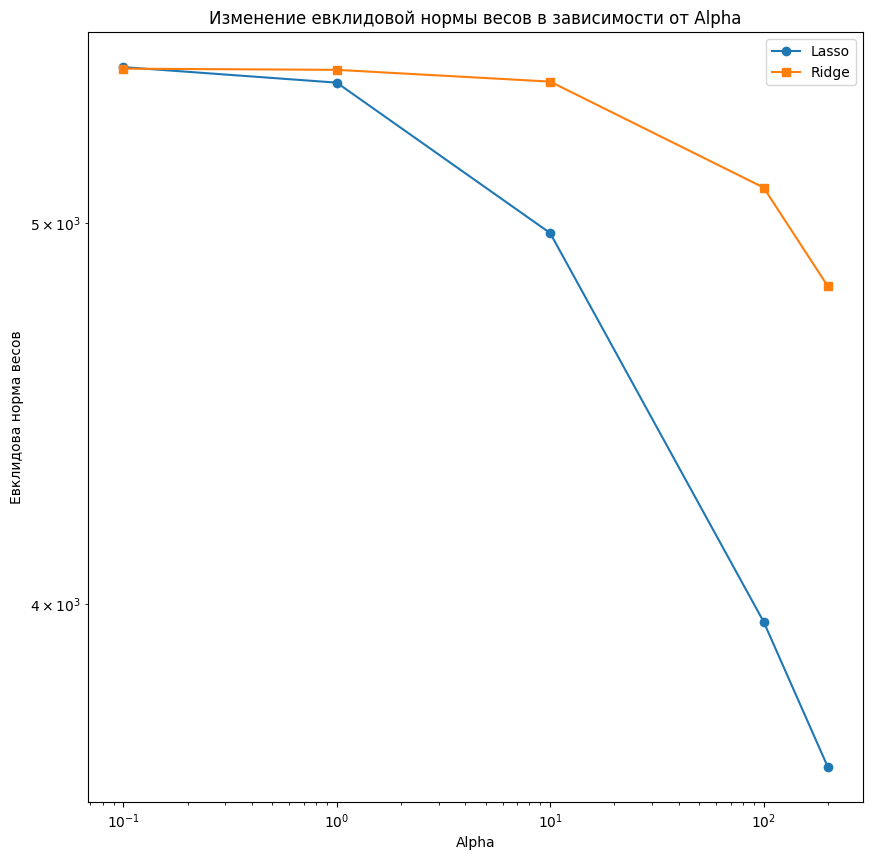

In [190]:
alphas = [0.1, 1, 10, 100, 200]
lasso_norms = []
ridge_norms = []

for alpha in alphas:
    lasso_reg = Lasso(alpha=alpha)
    lasso_reg.fit(X_train_scaled, y_train)
    lasso_norms.append(np.linalg.norm(lasso_reg.coef_))

    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X_train_scaled, y_train)
    ridge_norms.append(np.linalg.norm(ridge_reg.coef_))

plt.figure(figsize=(10, 10))

plt.plot(alphas, lasso_norms, label='Lasso', marker='o')
plt.plot(alphas, ridge_norms, label='Ridge', marker='s')

plt.xlabel('Alpha')
plt.ylabel('Евклидова норма весов')


plt.xscale('log')
plt.yscale('log')
plt.title('Изменение евклидовой нормы весов в зависимости от Alpha')


plt.legend()
plt.show()

**Задача 3.10 (0.5 балла)**
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.

In [192]:
from sklearn.linear_model import LassoCV
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=0)
lasso_cv.fit(X_train_scaled, y_train)

print("Тестированные значения alpha:", lasso_cv.alphas_)
print("Среднее MSE для каждого alpha:", np.mean(lasso_cv.mse_path_, axis=1))

optimal_alpha = lasso_cv.alpha_
print("Оптимальное значение alpha:", optimal_alpha)

Тестированные значения alpha: [2.e+02 1.e+02 1.e+01 1.e+00 1.e-01]
Среднее MSE для каждого alpha: [1957761.40826602 1538655.41917419 1300191.66837514 1289608.97079641
 1289640.94034045]
Оптимальное значение alpha: 1.0


**Задача 3.11 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [193]:
lasso = Lasso(alpha= optimal_alpha)

lasso.fit(X_train_scaled, y_train)

coefficients = pd.DataFrame(lasso.coef_, index=X_train.columns, columns=['Coefficient'])
print(coefficients)

non_informative_features = coefficients[coefficients['Coefficient'] == 0].index.tolist()
informative_features = coefficients[coefficients['Coefficient'] != 0].index.tolist()

print("Неинформативные признаки:", non_informative_features)
print("Информативные признаки:", informative_features)

               Coefficient
carat          5223.547868
depth           -85.372334
table           -56.771939
x             -1012.675873
y                -0.000000
z               -30.922658
cut_Fair       -124.881238
cut_Good        -49.831958
cut_Ideal        35.476601
cut_Premium       0.000000
cut_Very Good   -14.124345
color_D         165.250152
color_E         108.979146
color_F          77.892176
color_G          -0.000000
color_H        -176.741307
color_I        -296.805684
color_J        -411.467669
clarity_I1     -494.119800
clarity_IF      200.131332
clarity_SI1    -260.153084
clarity_SI2    -591.631680
clarity_VS1     113.927147
clarity_VS2      -0.000000
clarity_VVS1    188.254093
clarity_VVS2    198.966240
Неинформативные признаки: ['y', 'cut_Premium', 'color_G', 'clarity_VS2']
Информативные признаки: ['carat', 'depth', 'table', 'x', 'z', 'cut_Fair', 'cut_Good', 'cut_Ideal', 'cut_Very Good', 'color_D', 'color_E', 'color_F', 'color_H', 'color_I', 'color_J', 'clarity_I1', 'c

**Задача 3.12 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [194]:
y_pred_lasso = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print("MSE для Lasso-регрессии:", mse_lasso)
if mse_lasso < MSE_test:
    print("Lasso-регрессия показывает лучшие результаты.")
else:
    print("Обычная линейная регрессия показывает лучшие результаты.")

MSE для Lasso-регрессии: 116585804.2862309
Обычная линейная регрессия показывает лучшие результаты.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(
